In [33]:
!pip install pandas
!pip install numpy
import pandas as pd
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [34]:
df = pd.read_csv("2sec_normed.csv")
df.set_index('datetime', inplace=True)
df.head()

,PRICE,SIZE,vol
datetime,,,
2021-01-04 04:00:00,-1.473138,-0.009929,NaN
2021-01-04 04:00:02,NaN,-0.017278,NaN
2021-01-04 04:00:04,NaN,-0.017278,NaN
2021-01-04 04:00:06,NaN,-0.017278,NaN
2021-01-04 04:00:08,NaN,-0.017278,NaN


In [35]:
horizon=275

df['vol_horizon'] = df.vol.shift(periods=-horizon)
df['PRICE_horizon'] = df.PRICE.shift(periods=-horizon)
df['PRICE_slope_horizon'] = 1.0 *(df.PRICE <= df.PRICE_horizon)
df['vol_slope_horizon'] = 1.0 *(df.vol <= df.vol_horizon)
df.head()

,PRICE,SIZE,vol,vol_horizon,PRICE_horizon,PRICE_slope_horizon,vol_slope_horizon
datetime,,,,,,,
2021-01-04 04:00:00,-1.473138,-0.009929,NaN,NaN,NaN,0.0,0.0
2021-01-04 04:00:02,NaN,-0.017278,NaN,NaN,NaN,0.0,0.0
2021-01-04 04:00:04,NaN,-0.017278,NaN,NaN,NaN,0.0,0.0
2021-01-04 04:00:06,NaN,-0.017278,NaN,NaN,NaN,0.0,0.0
2021-01-04 04:00:08,NaN,-0.017278,NaN,NaN,NaN,0.0,0.0


In [36]:
df_no_na = df.dropna()
df_no_na.head(500)

,PRICE,SIZE,vol,vol_horizon,PRICE_horizon,PRICE_slope_horizon,vol_slope_horizon
datetime,,,,,,,
2021-01-04 09:33:18,-1.600373,0.031560,1.578028,0.951655,-1.722015,0.0,0.0
2021-01-04 09:33:20,-1.600808,0.116197,1.558087,0.906465,-1.721643,0.0,0.0
2021-01-04 09:33:22,-1.602416,0.149998,1.555718,0.882700,-1.721229,0.0,0.0
2021-01-04 09:33:24,-1.603306,0.198871,1.519604,0.883145,-1.720611,0.0,0.0
2021-01-04 09:33:26,-1.609564,0.144241,1.535405,0.927515,-1.713453,0.0,0.0
...,...,...,...,...,...,...,...
2021-01-04 09:49:48,-1.683974,0.075691,0.293717,0.336240,-1.693918,0.0,1.0
2021-01-04 09:49:50,-1.679121,0.130354,0.326608,0.335994,-1.694352,0.0,1.0
2021-01-04 09:49:52,-1.677839,0.084801,0.328991,0.355853,-1.698711,0.0,1.0


In [37]:
len(df_no_na)

949123

In [38]:
df_no_na.to_csv(f"2sec_{horizon}horizon.csv")

In [39]:
df_no_na.corr()

,PRICE,SIZE,vol,vol_horizon,PRICE_horizon,PRICE_slope_horizon,vol_slope_horizon
PRICE,1.000000,-0.009347,-0.098861,-0.113842,0.999281,-0.002651,-0.003172
SIZE,-0.009347,1.000000,0.026577,0.028388,-0.008885,0.002228,-0.008350
vol,-0.098861,0.026577,1.000000,0.166364,-0.097184,0.014067,-0.161346
vol_horizon,-0.113842,0.028388,0.166364,1.000000,-0.114887,-0.035141,0.121695
PRICE_horizon,0.999281,-0.008885,-0.097184,-0.114887,1.000000,0.022773,-0.006874
PRICE_slope_horizon,-0.002651,0.002228,0.014067,-0.035141,0.022773,1.000000,-0.091571
vol_slope_horizon,-0.003172,-0.008350,-0.161346,0.121695,-0.006874,-0.091571,1.000000


<AxesSubplot:xlabel='datetime'>

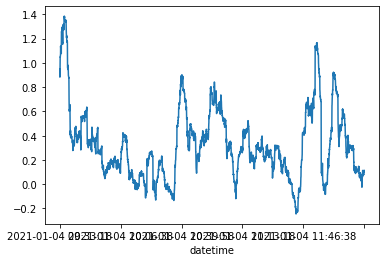

In [40]:
df_no_na[:5000].vol_horizon.plot()